In [227]:
#conda install -c plotly
#conda install -c conda-forge mlxtend
#conda install python-graphviz

import numpy as np
from numpy import corrcoef, sum, log, arange
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import itertools
from matplotlib.ticker import FuncFormatter
from matplotlib.ticker import MaxNLocator

import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn import svm, neighbors, tree, model_selection, preprocessing, metrics
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression 
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve

from mlxtend.plotting import plot_decision_regions
import graphviz
import plotly
import plotly.plotly as py
from pylab import pcolor, show, colorbar, xticks, yticks

plt.rcParams['figure.figsize'] = (40.0, 20.0)
%matplotlib inline

In [228]:
#Read dataset
names = ['state', 'account_len', 'area_code', 'phone', 'intl_plan', 'vmail_plan', 'vmail_msg', 'day_mins', 'day_calls', 'day_charge', 'eve_mins', 'eve_calls', 'eve_charge', 'night_mins', 'night_calls', 'night_charge', 'intl_mins', 'intl_calls', 'intl_charge', 'custserv_calls', 'churn']

df_orig = pd.read_csv('https://raw.githubusercontent.com/jgoodz8/3250-churn-4/master/customer_churn.csv',
                      header = 0, names = names)

#df_orig = pd.read_csv('customer_churn.csv',
#                      names = names, header = 0)
df_orig.iloc[:20]

state  account_len  area_code     phone intl_plan vmail_plan  vmail_msg  \
0     KS          128        415  382-4657        no        yes         25   
1     OH          107        415  371-7191        no        yes         26   
2     NJ          137        415  358-1921        no         no          0   
3     OH           84        408  375-9999       yes         no          0   
4     OK           75        415  330-6626       yes         no          0   
5     AL          118        510  391-8027       yes         no          0   
6     MA          121        510  355-9993        no        yes         24   
7     MO          147        415  329-9001       yes         no          0   
8     LA          117        408  335-4719        no         no          0   
9     WV          141        415  330-8173       yes        yes         37   
10    IN           65        415  329-6603        no         no          0   
11    RI           74        415  344-9403        no         no          0   
12    IA          168        408  363-1107        no         no          0   
13    MT           95        510  394-8006        no         no          0   
14    IA           62        415  366-9238        no         no          0   
15    NY          161        415  351-7269        no         no          0   
16    ID           85        408  350-8884        no        yes         27   
17    VT           93        510  386-2923        no         no          0   
18    VA           76        510  356-2992        no        yes         33   
19    TX           73        415  373-2782        no         no          0   

    day_mins  day_calls  day_charge   ...    eve_calls  eve_charge  \
0      265.1        110       45.07   ...           99       16.78   
1      161.6        123       27.47   ...          103       16.62   
2      243.4        114       41.38   ...          110       10.30   
3      299.4         71       50.90   ...           88        5.26   
4      166.7        113       28.34   ...          122       12.61   
5      223.4         98       37.98   ...          101       18.75   
6      218.2         88       37.09   ...          108       29.62   
7      157.0         79       26.69   ...           94        8.76   
8      184.5         97       31.37   ...           80       29.89   
9      258.6         84       43.96   ...          111       18.87   
10     129.1        137       21.95   ...           83       19.42   
11     187.7        127       31.91   ...          148       13.89   
12     128.8         96       21.90   ...           71        8.92   
13     156.6         88       26.62   ...           75       21.05   
14     120.7         70       20.52   ...           76       26.11   
15     332.9         67       56.59   ...           97       27.01   
16     196.4        139       33.39   ...           90       23.88   
17     190.7        114       32.42   ...          111       18.55   
18     189.7         66       32.25   ...           65       18.09   
19     224.4         90       38.15   ...           88       13.56   

    night_mins  night_calls  night_charge  intl_mins  intl_calls  intl_charge  \
0        244.7           91         11.01       10.0           3         2.70   
1        254.4          103         11.45       13.7           3         3.70   
2        162.6          104          7.32       12.2           5         3.29   
3        196.9           89          8.86        6.6           7         1.78   
4        186.9          121          8.41       10.1           3         2.73   
5        203.9          118          9.18        6.3           6         1.70   
6        212.6          118          9.57        7.5           7         2.03   
7        211.8           96          9.53        7.1           6         1.92   
8        215.8           90          9.71        8.7           4         2.35   
9        326.4           97         14.69       11.2           5         3.02   
10

In [229]:
df_orig.describe()

account_len    area_code    vmail_msg     day_mins    day_calls  \
count  3333.000000  3333.000000  3333.000000  3333.000000  3333.000000   
mean    101.064806   437.182418     8.099010   179.775098   100.435644   
std      39.822106    42.371290    13.688365    54.467389    20.069084   
min       1.000000   408.000000     0.000000     0.000000     0.000000   
25%      74.000000   408.000000     0.000000   143.700000    87.000000   
50%     101.000000   415.000000     0.000000   179.400000   101.000000   
75%     127.000000   510.000000    20.000000   216.400000   114.000000   
max     243.000000   510.000000    51.000000   350.800000   165.000000   

        day_charge     eve_mins    eve_calls   eve_charge   night_mins  \
count  3333.000000  3333.000000  3333.000000  3333.000000  3333.000000   
mean     30.562307   200.980348   100.114311    17.083540   200.872037   
std       9.259435    50.713844    19.922625     4.310668    50.573847   
min       0.000000     0.000000     0.000000     0.000000    23.200000   
25%      24.430000   166.600000    87.000000    14.160000   167.000000   
50%      30.500000   201.400000   100.000000    17.120000   201.200000   
75%      36.790000   235.300000   114.000000    20.000000   235.300000   
max      59.640000   363.700000   170.000000    30.910000   395.000000   

       night_calls  night_charge    intl_mins   intl_calls  intl_charge  \
count  3333.000000   3333.000000  3333.000000  3333.000000  3333.000000   
mean    100.107711      9.039325    10.237294     4.479448     2.764581   
std      19.568609      2.275873     2.791840     2.461214     0.753773   
min      33.000000      1.040000     0.000000     0.000000     0.000000   
25%      87.000000      7.520000     8.500000     3.000000     2.300000   
50%     100.000000      9.050000    10.300000     4.000000     2.780000   
75%     113.000000     10.590000    12.100000     6.000000     3.270000   
max     175.000000     17.770000    20.000000    20.000000     5.400000   

       custserv_calls  
count     3333.000000  
mean         1.562856  
std          1.315491  
min          0.000000  
25%          1.000000  
50%          1.000000  
75%          2.000000  
max          9.000000

In [230]:
df_orig.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
state             3333 non-null object
account_len       3333 non-null int64
area_code         3333 non-null int64
phone             3333 non-null object
intl_plan         3333 non-null object
vmail_plan        3333 non-null object
vmail_msg         3333 non-null int64
day_mins          3333 non-null float64
day_calls         3333 non-null int64
day_charge        3333 non-null float64
eve_mins          3333 non-null float64
eve_calls         3333 non-null int64
eve_charge        3333 non-null float64
night_mins        3333 non-null float64
night_calls       3333 non-null int64
night_charge      3333 non-null float64
intl_mins         3333 non-null float64
intl_calls        3333 non-null int64
intl_charge       3333 non-null float64
custserv_calls    3333 non-null int64
churn             3333 non-null object
dtypes: float64(8), int64(8), object(5)
memory usage: 546.9+ KB


In [231]:
#Create copy of dataframe
df = df_orig.copy()
df.head()

state  account_len  area_code     phone intl_plan vmail_plan  vmail_msg  \
0    KS          128        415  382-4657        no        yes         25   
1    OH          107        415  371-7191        no        yes         26   
2    NJ          137        415  358-1921        no         no          0   
3    OH           84        408  375-9999       yes         no          0   
4    OK           75        415  330-6626       yes         no          0   

   day_mins  day_calls  day_charge   ...    eve_calls  eve_charge  night_mins  \
0     265.1        110       45.07   ...           99       16.78       244.7   
1     161.6        123       27.47   ...          103       16.62       254.4   
2     243.4        114       41.38   ...          110       10.30       162.6   
3     299.4         71       50.90   ...           88        5.26       196.9   
4     166.7        113       28.34   ...          122       12.61       186.9   

   night_calls  night_charge  intl_mins  intl_calls  intl_charge  \
0           91         11.01       10.0           3         2.70   
1          103         11.45       13.7           3         3.70   
2          104          7.32       12.2           5         3.29   
3           89          8.86        6.6           7         1.78   
4          121          8.41       10.1           3         2.73   

   custserv_calls   churn  
0               1  False.  
1               1  False.  
2               0  False.  
3               2  False.  
4               3  False.  

[5 rows x 21 columns]

In [232]:
#transforming below fields into number

label_encoder = preprocessing.LabelEncoder()

df['intl_plan'] = label_encoder.fit_transform(df['intl_plan'])
df['vmail_plan'] = label_encoder.fit_transform(df['vmail_plan'])
df['churn'] = label_encoder.fit_transform(df['churn'])

In [233]:
df.head()
#df.iloc[:20]

state  account_len  area_code     phone  intl_plan  vmail_plan  vmail_msg  \
0    KS          128        415  382-4657          0           1         25   
1    OH          107        415  371-7191          0           1         26   
2    NJ          137        415  358-1921          0           0          0   
3    OH           84        408  375-9999          1           0          0   
4    OK           75        415  330-6626          1           0          0   

   day_mins  day_calls  day_charge  ...    eve_calls  eve_charge  night_mins  \
0     265.1        110       45.07  ...           99       16.78       244.7   
1     161.6        123       27.47  ...          103       16.62       254.4   
2     243.4        114       41.38  ...          110       10.30       162.6   
3     299.4         71       50.90  ...           88        5.26       196.9   
4     166.7        113       28.34  ...          122       12.61       186.9   

   night_calls  night_charge  intl_mins  intl_calls  intl_charge  \
0           91         11.01       10.0           3         2.70   
1          103         11.45       13.7           3         3.70   
2          104          7.32       12.2           5         3.29   
3           89          8.86        6.6           7         1.78   
4          121          8.41       10.1           3         2.73   

   custserv_calls  churn  
0               1      0  
1               1      0  
2               0      0  
3               2      0  
4               3      0  

[5 rows x 21 columns]

In [234]:
#Check churn values
stay = df.churn.count() - df.churn.sum()
churn = df.churn.sum()

print ("# of pepole who stay: {0} ({1}%)".format(stay,stay/(churn+stay)*100))
print ("# of pepole who churn: {0} ({1}%)".format(churn,churn/(churn+stay)*100))
#Slightly unbalanced but enough of both classes to proceed

# of pepole who stay: 2850 (85.5085508550855%)
# of pepole who churn: 483 (14.491449144914492%)


In [235]:
df['total_charge'] = df.day_charge + df.eve_charge + df.night_charge + df.intl_charge 
df['total_mins'] = df.day_mins + df.eve_mins + df.night_mins + df.intl_mins
df['total_calls'] = df.day_calls + df.eve_calls + df.night_calls + df.intl_calls
df['avg_call_len'] = df.total_mins / df.total_calls
df.head()

state  account_len  area_code     phone  intl_plan  vmail_plan  vmail_msg  \
0    KS          128        415  382-4657          0           1         25   
1    OH          107        415  371-7191          0           1         26   
2    NJ          137        415  358-1921          0           0          0   
3    OH           84        408  375-9999          1           0          0   
4    OK           75        415  330-6626          1           0          0   

   day_mins  day_calls  day_charge      ...       night_charge  intl_mins  \
0     265.1        110       45.07      ...              11.01       10.0   
1     161.6        123       27.47      ...              11.45       13.7   
2     243.4        114       41.38      ...               7.32       12.2   
3     299.4         71       50.90      ...               8.86        6.6   
4     166.7        113       28.34      ...               8.41       10.1   

   intl_calls  intl_charge  custserv_calls  churn  total_charge  total_mins  \
0           3         2.70               1      0         75.56       717.2   
1           3         3.70               1      0         59.24       625.2   
2           5         3.29               0      0         62.29       539.4   
3           7         1.78               2      0         66.80       564.8   
4           3         2.73               3      0         52.09       512.0   

   total_calls  avg_call_len  
0          303      2.366997  
1          332      1.883133  
2          333      1.619820  
3          255      2.214902  
4          359      1.426184  

[5 rows x 25 columns]

In [236]:
#Define correlation heatmap function

def correlation_heatmap(df):
    
    corr = df.corr()
    
    _ , ax = plt.subplots(figsize =(5, 5))
    colormap = sns.diverging_palette(220, 10, as_cmap = True)
    
    mask = np.zeros_like(corr, dtype=np.bool)
    mask[np.triu_indices_from(mask)] = True
    
    _ = sns.heatmap(
        df.corr(), 
        cmap = colormap,
        square=True, 
        cbar_kws={'shrink':.6 }, 
        ax=ax,
        annot=True, 
        linewidths=0.1,vmax=1.0, linecolor='white',
        annot_kws={'fontsize':12 },
        mask=mask
    )
    
    plt.title('Pearson Correlation of Attributes', y=1.05, size=15)

Text(0.5,1.05,'Pearson Correlation of Attributes in Churn Dataset')

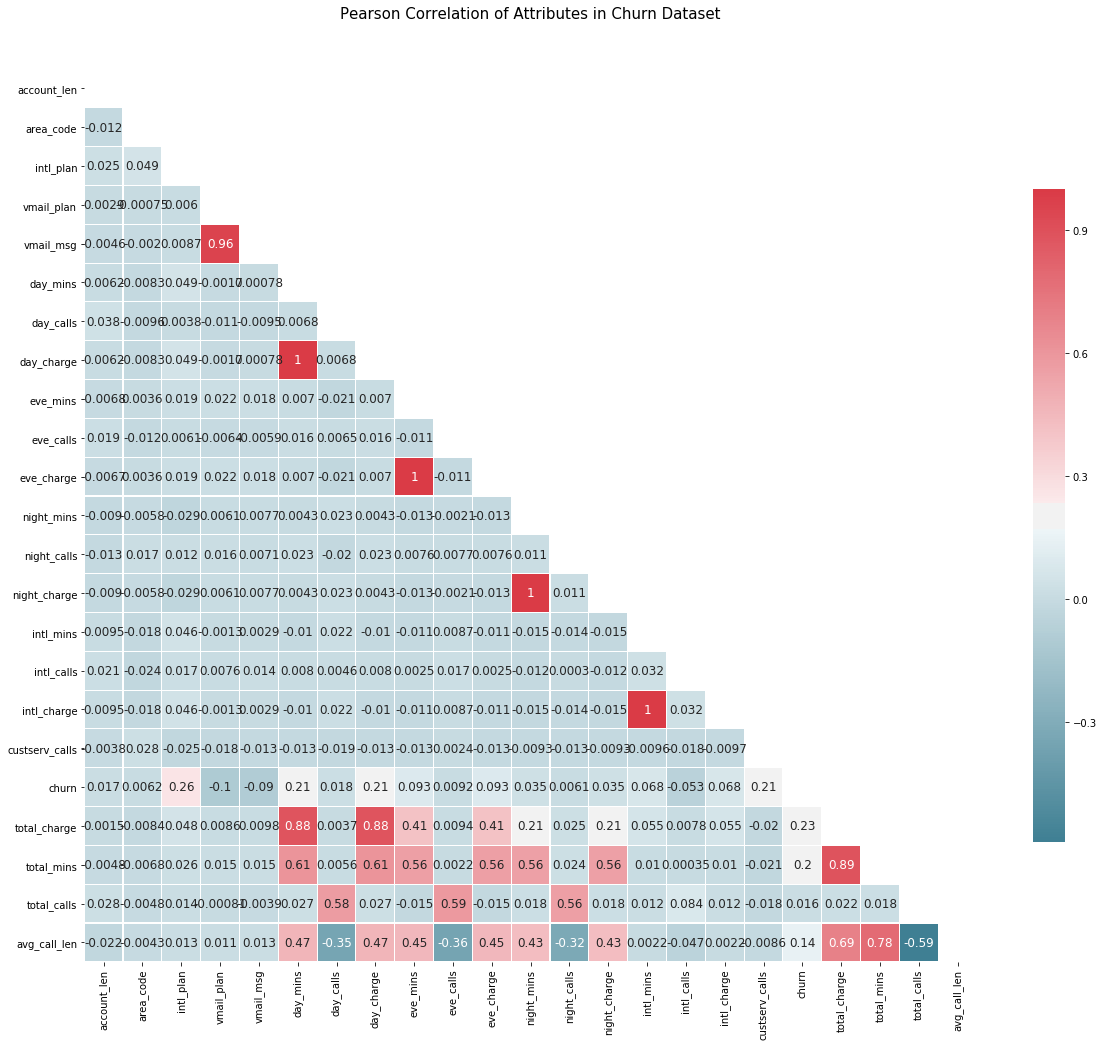

In [237]:
corr = df.corr()
    
_ , ax = plt.subplots(figsize =(20, 20))
colormap = sns.diverging_palette(220, 10, as_cmap = True)
    
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
    
_ = sns.heatmap(df.corr(), 
                cmap = colormap,
                square=True, 
                cbar_kws={'shrink':.6 }, 
                ax=ax,
                annot=True, 
                linewidths=0.1,vmax=1.0, linecolor='white',
                annot_kws={'fontsize':12 },
                mask=mask)
    
plt.title('Pearson Correlation of Attributes in Churn Dataset', y=1.05, size=15)

#charge and minutes are highly correlated for day,evening and night. Likely a fixed charge per minute, suggest to keep only raw value minutes
#International plan, day mins, and customer service calls seem to have a weak positive relationship with churn

In [175]:
#Create aggregated state dataset

#state_df = df.groupby('state').agg({'churn': 'sum'}).apply(lambda x: 100 * x / x.size())
#state_df = df.groupby('state')['churn'].sum()
#state_df.astype(int)

state_df = pd.crosstab(df['state'],df['churn'])

state_df['churn'] = state_df[1] / state_df.sum(axis=1)

state_df

churn   0   1     churn
state                  
AK     49   3  0.057692
AL     72   8  0.100000
AR     44  11  0.200000
AZ     60   4  0.062500
CA     25   9  0.264706
CO     57   9  0.136364
CT     62  12  0.162162
DC     49   5  0.092593
DE     52   9  0.147541
FL     55   8  0.126984
GA     46   8  0.148148
HI     50   3  0.056604
IA     41   3  0.068182
ID     64   9  0.123288
IL     53   5  0.086207
IN     62   9  0.126761
KS     57  13  0.185714
KY     51   8  0.135593
LA     47   4  0.078431
MA     54  11  0.169231
MD     53  17  0.242857
ME     49  13  0.209677
MI     57  16  0.219178
MN     69  15  0.178571
MO     56   7  0.111111
MS     51  14  0.215385
MT     54  14  0.205882
NC     57  11  0.161765
ND     56   6  0.096774
NE     56   5  0.081967
NH     47   9  0.160714
NJ     50  18  0.264706
NM     56   6  0.096774
NV     52  14  0.212121
NY     68  15  0.180723
OH     68  10  0.128205
OK     52   9  0.147541
OR     67  11  0.141026
PA     37   8  0.177778
RI     59   6  0.092308
SC     46  14  0.233333
SD     52   8  0.133333
TN     48   5  0.094340
TX     54  18  0.250000
UT     62  10  0.138889
VA     72   5  0.064935
VT     65   8  0.109589
WA     52  14  0.212121
WI     71   7  0.089744
WV     96  10  0.094340
WY     68   9  0.116883

In [176]:
#Visualize state data
scl = [[0.0, 'rgb(242,240,247)'],[0.2, 'rgb(218,218,235)'],[0.4, 'rgb(188,189,220)'],\
            [0.6, 'rgb(158,154,200)'],[0.8, 'rgb(117,107,177)'],[1.0, 'rgb(84,39,143)']]

data = [ dict(
        type='choropleth',
        colorscale = scl,
        autocolorscale = False,
        locations = state_df.index,
        z = state_df.churn,
        locationmode = 'USA-states',
        #text = df['text'],
        marker = dict(
            line = dict (
                color = 'rgb(255,255,255)',
                width = 2
            ) ),
        colorbar = dict(
            title = "Churn Percentage")
        ) ]

layout = dict(
        title = 'Churn Percentage by State<br>(Hover for breakdown)',
        geo = dict(
            scope='usa',
            projection=dict( type='albers usa' ),
            showlakes = True,
            lakecolor = 'rgb(255, 255, 255)'),
             )
    
fig = dict( data=data, layout=layout )
py.iplot( fig, filename='d3-cloropleth-map' )

High five! You successfully sent some data to your account on plotly. View your plot in your browser at https://plot.ly/~scasselhas/0 or inside your plot.ly account where it is named 'd3-cloropleth-map'


In [238]:
df['state'] = label_encoder.fit_transform(df['state'])

churn         0    1
area_code           
408         716  122
415        1419  236
510         715  125
---------------------------------------------------
churn             0         1
area_code                    
408        0.854415  0.145585
415        0.857402  0.142598
510        0.851190  0.148810


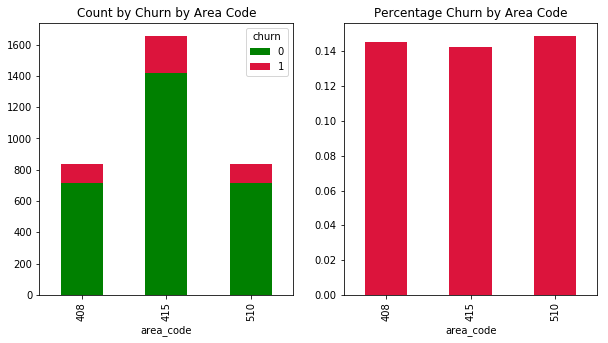

In [239]:
#Doing a check to see if area_code adds predictive value
area_cross = pd.crosstab(df['area_code'],df['churn'])
area_cross

print(area_cross)
print('---------------------------------------------------')
area_pct = area_cross.div(area_cross.sum(axis = 1), axis = 0)
print(area_pct)

colours = ['green','crimson']

fig, axes = plt.subplots(1,2,figsize=(10,5))
area_cross.plot.bar(ax = axes[0], stacked = True, color = colours, title = 'Count by Churn by Area Code')
area_pct.iloc[:,1].plot.bar(ax = axes[1], color = 'crimson', title = 'Percentage Churn by Area Code')

churn         0    1
intl_plan           
0          2664  346
1           186  137
---------------------------------------------------
churn             0         1
intl_plan                    
0          0.885050  0.114950
1          0.575851  0.424149


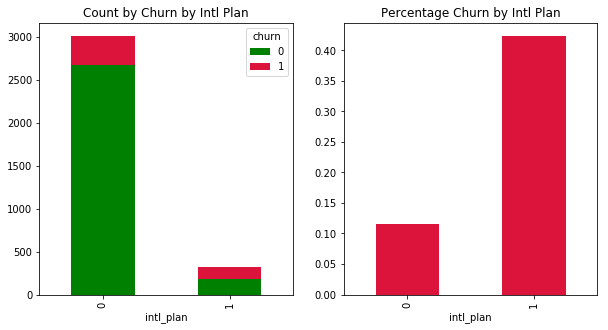

In [240]:
intl_cross = pd.crosstab(df['intl_plan'],df['churn'])
intl_cross

print(intl_cross)
print('---------------------------------------------------')
intl_pct = intl_cross.div(intl_cross.sum(axis = 1), axis = 0)
print(intl_pct)

colours = ['green','crimson']

fig, axes = plt.subplots(1,2,figsize=(10,5))
intl_cross.plot.bar(ax = axes[0], stacked = True, color = colours, title = 'Count by Churn by Intl Plan')
intl_pct.iloc[:,1].plot.bar(ax = axes[1], color = 'crimson', title = 'Percentage Churn by Intl Plan')

#Higher churn among users with an international plan

churn          0    1
vmail_plan           
0           2008  403
1            842   80
---------------------------------------------------
churn              0         1
vmail_plan                    
0           0.832849  0.167151
1           0.913232  0.086768


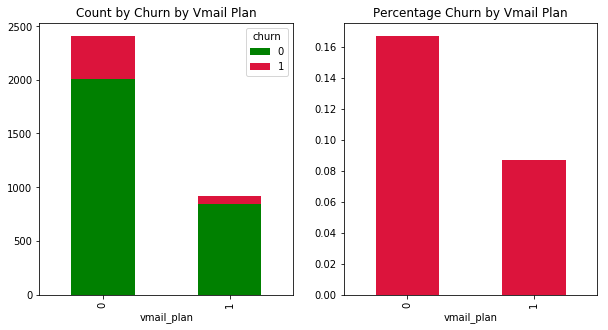

In [241]:
vmail_cross = pd.crosstab(df['vmail_plan'],df['churn'])
vmail_cross

print(vmail_cross)
print('---------------------------------------------------')
vmail_pct = vmail_cross.div(vmail_cross.sum(axis = 1), axis = 0)
print(vmail_pct)

colours = ['green','crimson']

fig, axes = plt.subplots(1,2,figsize=(10,5))
vmail_cross.plot.bar(ax = axes[0], stacked = True, color = colours, title = 'Count by Churn by Vmail Plan')
vmail_pct.iloc[:,1].plot.bar(ax = axes[1], color = 'crimson', title = 'Percentage Churn by Vmail Plan')

#Slightly lower churn if have a voicemail plan

In [242]:
#Area_code did not seem to have predictive value, so drop along with day, eve and night charge
#Also drop phone number

df.drop(['area_code','phone','day_charge','eve_charge', 'night_charge'], axis=1, inplace = True)
df.head()

state  account_len  intl_plan  vmail_plan  vmail_msg  day_mins  day_calls  \
0     16          128          0           1         25     265.1        110   
1     35          107          0           1         26     161.6        123   
2     31          137          0           0          0     243.4        114   
3     35           84          1           0          0     299.4         71   
4     36           75          1           0          0     166.7        113   

   eve_mins  eve_calls  night_mins  night_calls  intl_mins  intl_calls  \
0     197.4         99       244.7           91       10.0           3   
1     195.5        103       254.4          103       13.7           3   
2     121.2        110       162.6          104       12.2           5   
3      61.9         88       196.9           89        6.6           7   
4     148.3        122       186.9          121       10.1           3   

   intl_charge  custserv_calls  churn  total_charge  total_mins  total_calls  \
0         2.70               1      0         75.56       717.2          303   
1         3.70               1      0         59.24       625.2          332   
2         3.29               0      0         62.29       539.4          333   
3         1.78               2      0         66.80       564.8          255   
4         2.73               3      0         52.09       512.0          359   

   avg_call_len  
0      2.366997  
1      1.883133  
2      1.619820  
3      2.214902  
4      1.426184

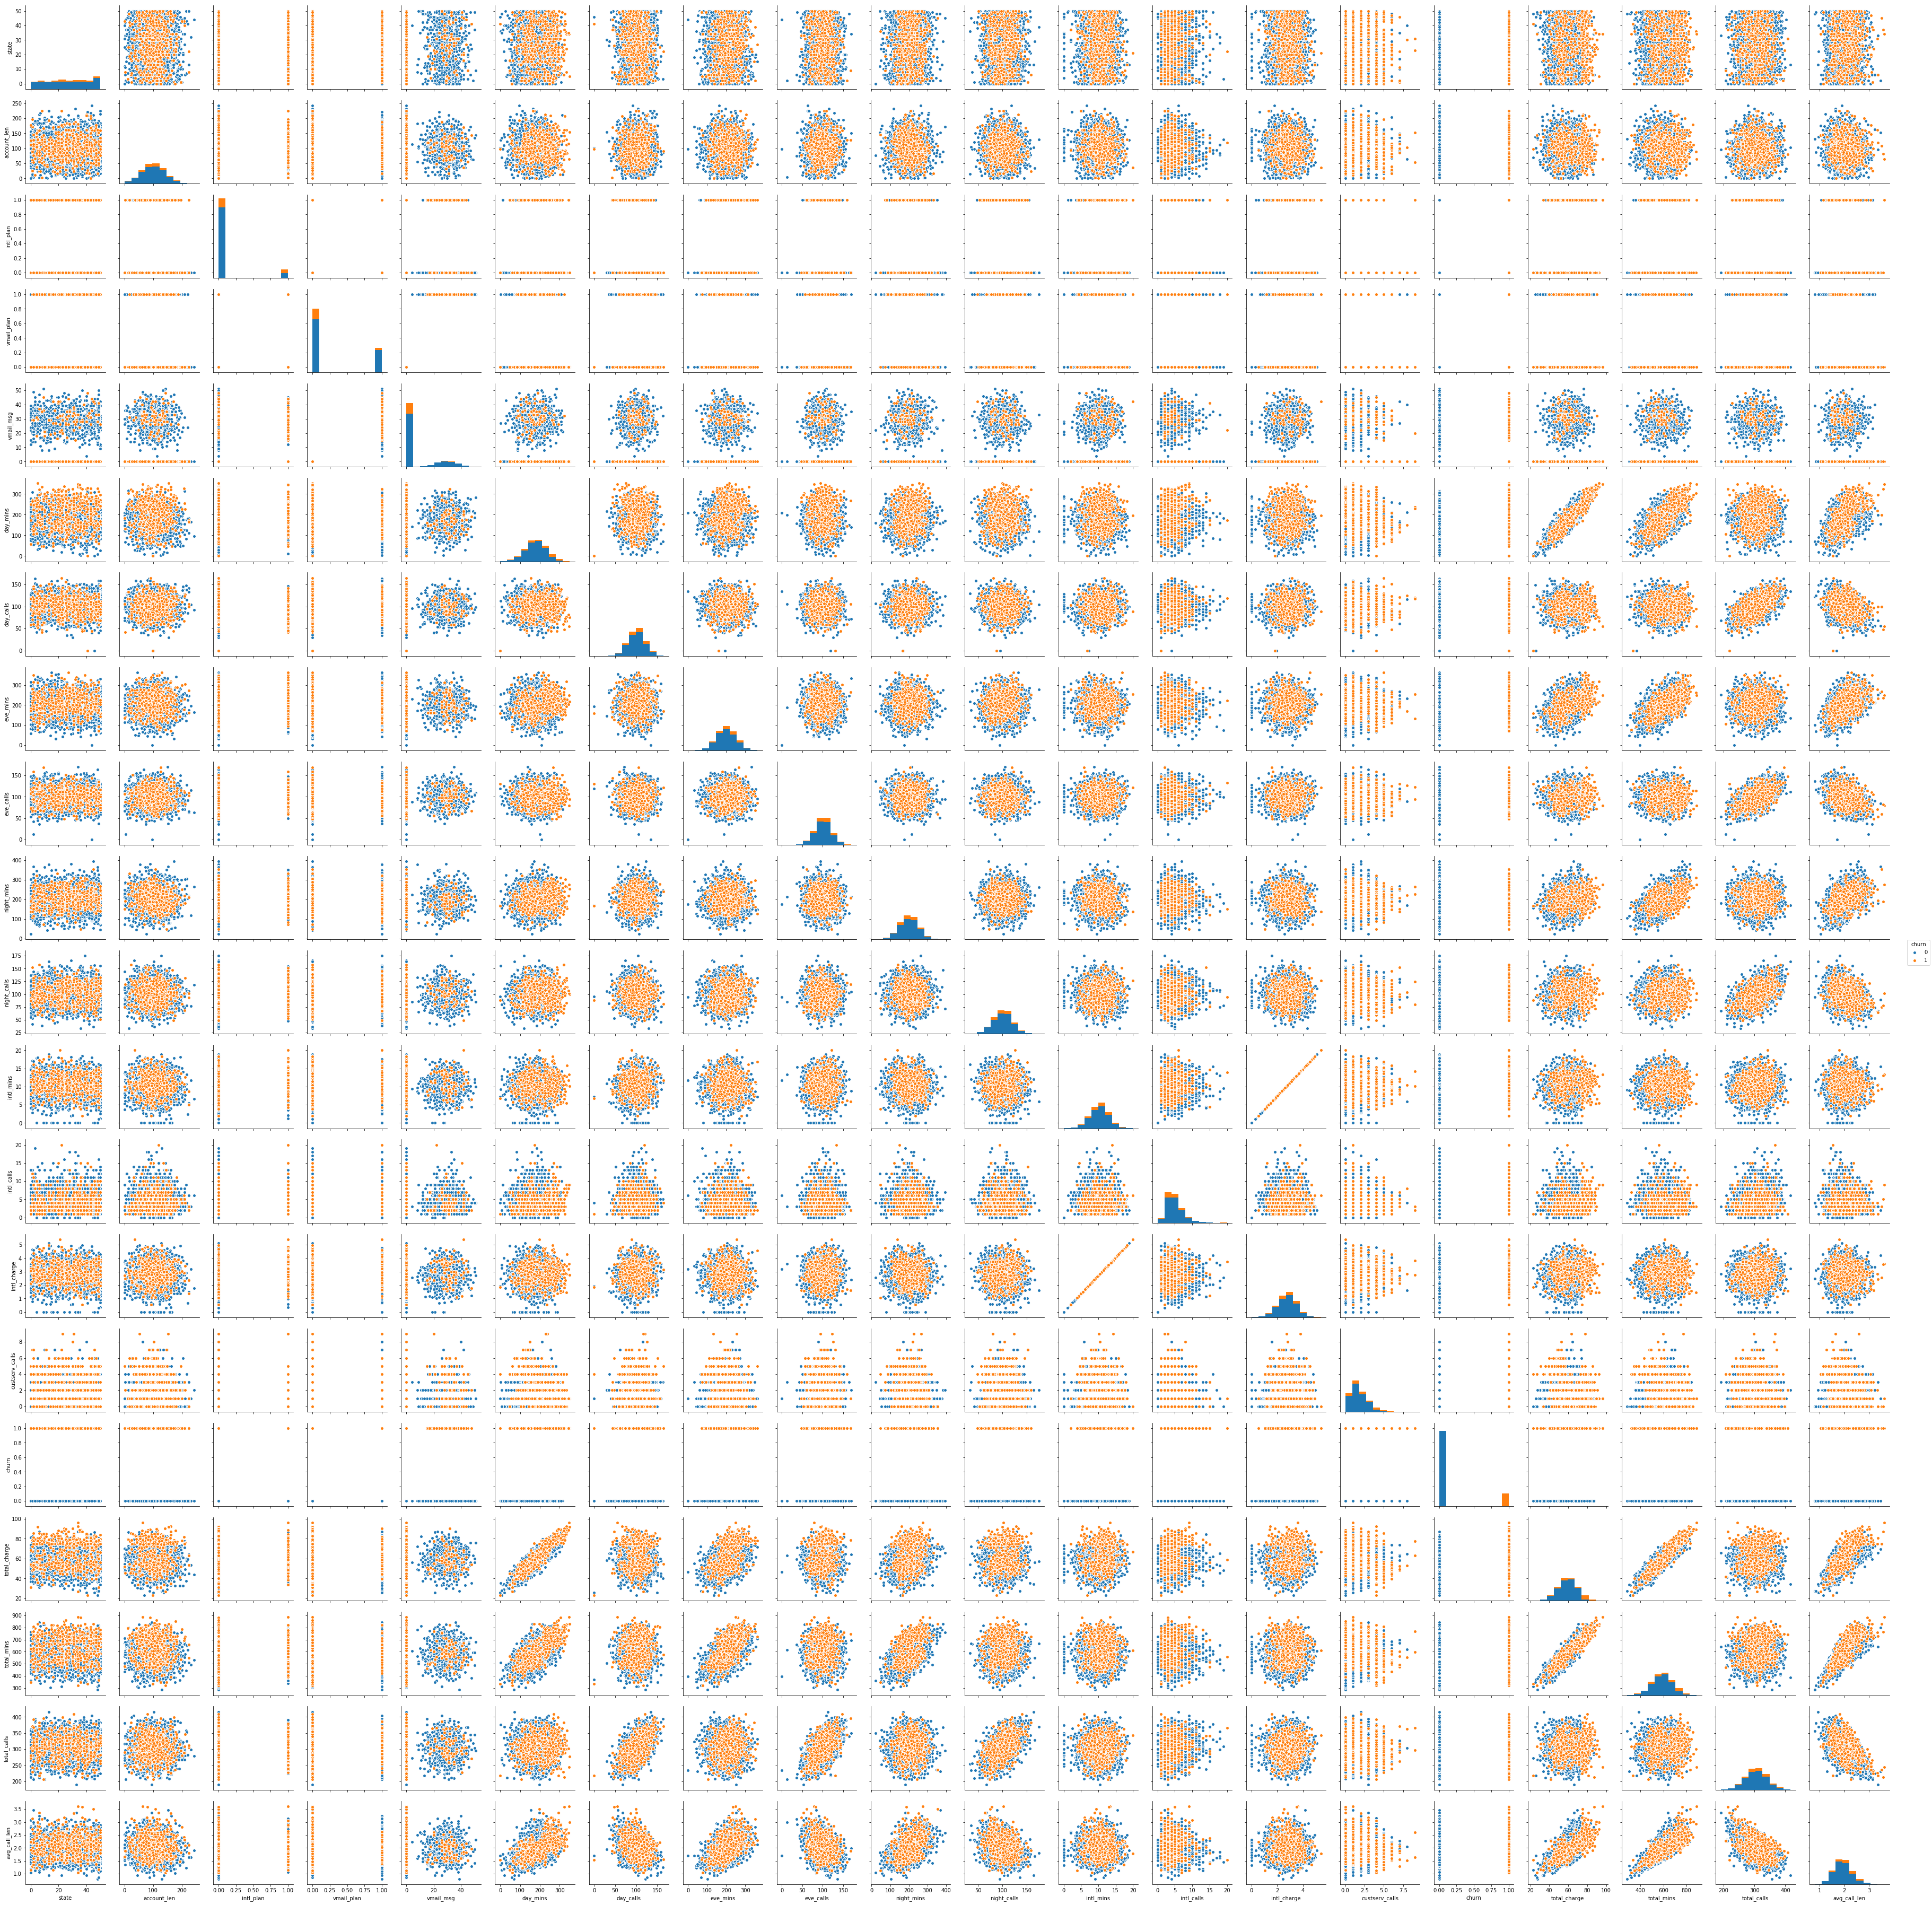

In [182]:
sns.pairplot(df,hue='churn')

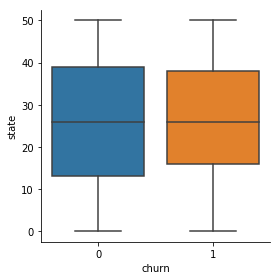

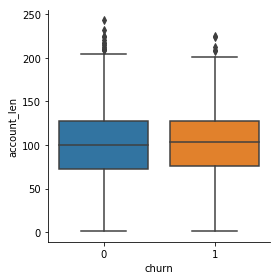

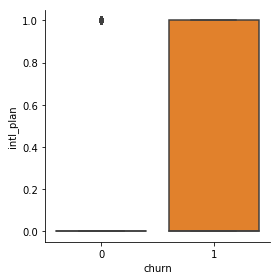

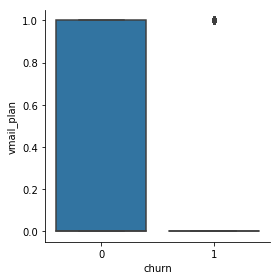

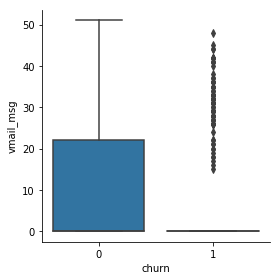

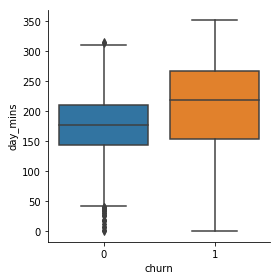

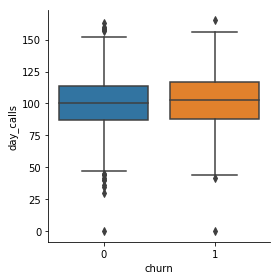

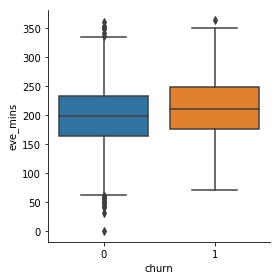

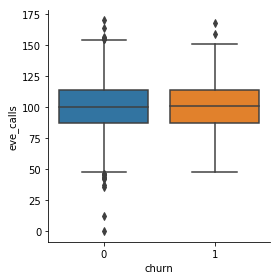

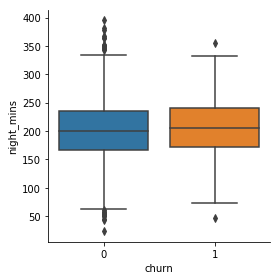

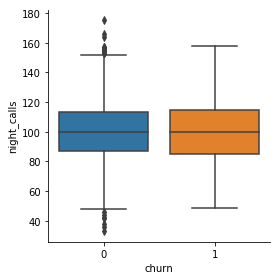

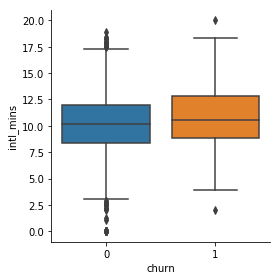

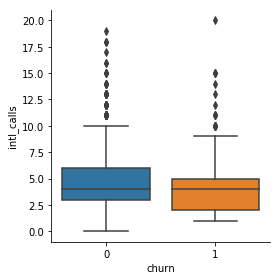

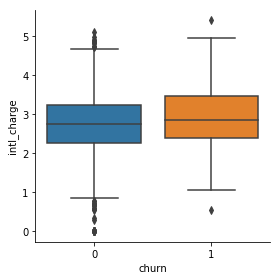

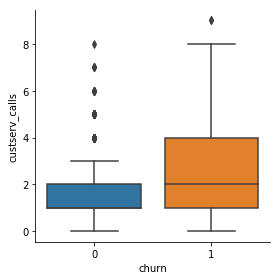

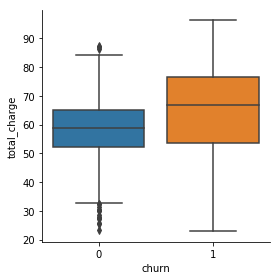

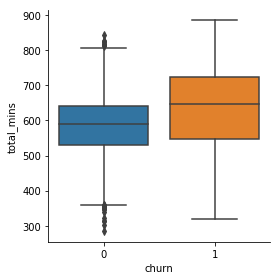

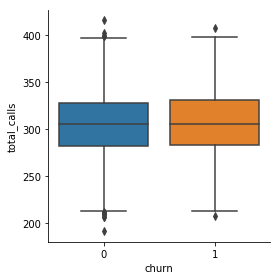

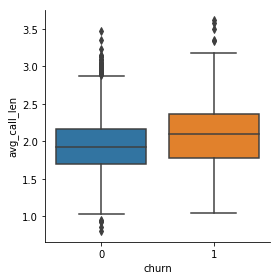

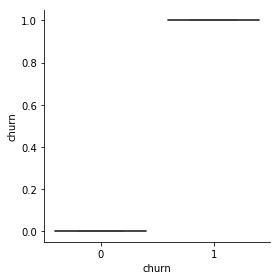

In [185]:
for colname, col in df.iteritems():
    p = sns.factorplot(x = 'churn', y = colname, kind = 'box', data = df)
    show(p)

In [243]:
cols = list(df.columns.values) #Make a list of all of the columns in the df
cols.pop(cols.index('churn')) #Remove churn from list
df = df[cols+['churn']] #Create new dataframe with churn on far right
#df.iloc[:20]

In [244]:
# Split-out validation dataset
array = df.values
X = array[:,:19] # Features/Independent Variables
Y = array[:,19] # Response/Class Variable

# One-third of data as a part of test set
validation_size = 0.33

seed = 7
X_train, X_validation, Y_train, Y_validation = model_selection.train_test_split(X, Y, test_size=validation_size, random_state=seed)

train_size = len(X_train)
val_size = len(X_validation)
print(val_size)
print(train_size)
#pd.DataFrame(X)

1100
2233


In [245]:
#Initialize Gaussian Naive Bayes
gaussian = GaussianNB()

# Test options and evaluation metric
scoring = 'accuracy'

#Fitting the training set
gaussian.fit(X_train, Y_train) 

#Predicting for the Test(Validation) Set
pred_gaussian = gaussian.predict(X_validation)

#Training set accuracy
msg = "%s: %f" % ('Training Model accuracy', gaussian.score(X_train,Y_train))
print(msg)

#Validation set accuracy
msg = "%s: %f" % ('Validation Model accuracy', sklearn.metrics.accuracy_score(Y_validation,pred_gaussian))
print(msg)

Training Model accuracy: 0.869682
Validation Model accuracy: 0.874545


In [246]:
#Model Performance
#setting performance parameters
kfold = model_selection.KFold(n_splits=10, random_state=seed)

#calling the cross validation function
gaussian_cv_results = model_selection.cross_val_score(GaussianNB(), X_train, Y_train, cv=kfold, scoring=scoring)

#displaying the mean and standard deviation of the prediction
msg = "%s: %f (%f)" % ('NB accuracy', gaussian_cv_results.mean(), gaussian_cv_results.std())
print(msg)

NB accuracy: 0.865643 (0.016462)


In [247]:
#Initialize Gaussian Naive Bayes
dtree = tree.DecisionTreeClassifier()

# Test options and evaluation metric
scoring = 'accuracy'

#Fitting the training set
dtree.fit(X_train, Y_train) 

#Predicting for the Test(Validation) Set
pred_dtree = dtree.predict(X_validation)

#Compare vs Y_validation
msg = "%s: %f" % ('Training Model accuracy', dtree.score(X_train,Y_train))
print(msg)

#Validation set accuracy
msg = "%s: %f" % ('Validation Model accuracy', sklearn.metrics.accuracy_score(Y_validation,pred_dtree))
print(msg)

Training Model accuracy: 1.000000
Validation Model accuracy: 0.960000


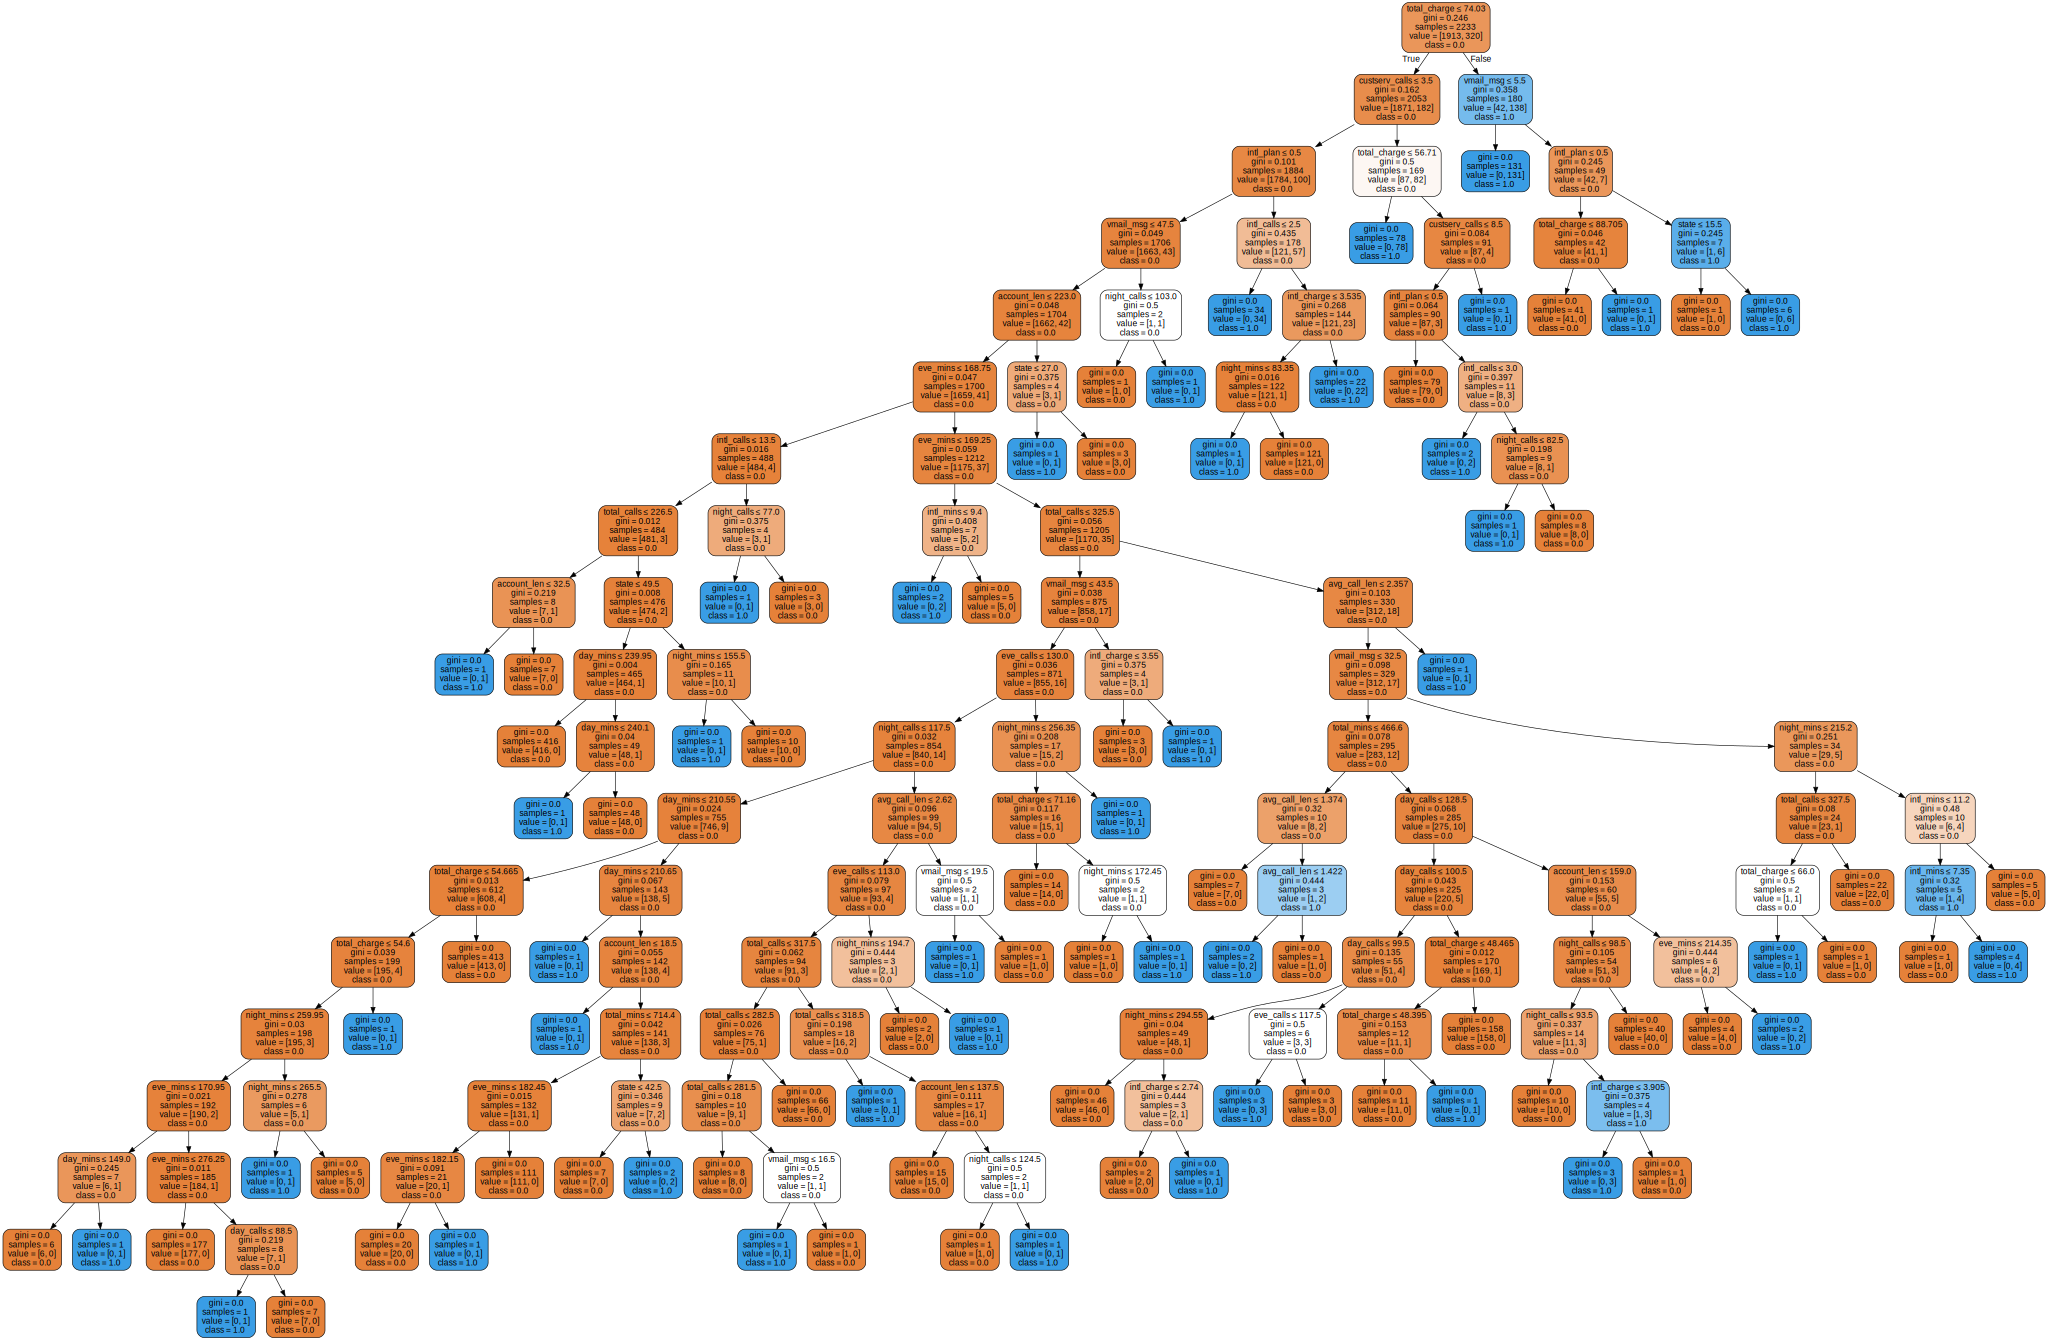

In [248]:
class_names = dtree.classes_.astype(str)
feature_names = df.columns[:19]

dot_data = tree.export_graphviz(dtree, out_file=None, 
                         feature_names=feature_names,  
                         class_names=class_names,  
                         filled=True, rounded=True,  
                         special_characters=True)  
dtree_graph = graphviz.Source(dot_data)  
dtree_graph

In [249]:
#Model Performance
#setting performance parameters
kfold = model_selection.KFold(n_splits=10, random_state=seed)

#calling the cross validation function
dtree_cv_results = model_selection.cross_val_score(dtree, X_train, Y_train, cv=kfold, scoring=scoring)

#displaying the mean and standard deviation of the prediction
msg = "%s: %f (%f)" % ('Decision Tree accuracy', dtree_cv_results.mean(), dtree_cv_results.std())
print(msg)

Decision Tree accuracy: 0.947155 (0.016636)


In [250]:
#Initialize Random Forest
rforest = RandomForestClassifier(n_estimators=100)

# Test options and evaluation metric
scoring = 'accuracy'

#Fitting the training set
rforest.fit(X_train, Y_train) 

#Predicting for the Test(Validation) Set
pred_rforest = rforest.predict(X_validation)

#Calculate accuracy in training set
msg = "%s: %f" % ('Training Model accuracy', rforest.score(X_train,Y_train,))
print(msg)

#Validation set accuracy
msg = "%s: %f" % ('Model accuracy', sklearn.metrics.accuracy_score(Y_validation,pred_rforest))
print(msg)

Training Model accuracy: 1.000000
Model accuracy: 0.980909


In [252]:
#Model Performance
#setting performance parameters
kfold = model_selection.KFold(n_splits=10, random_state=seed)

#calling the cross validation function
rforest_cv_results = model_selection.cross_val_score(rforest, X_train, Y_train, cv=kfold, scoring=scoring)

#displaying the mean and standard deviation of the prediction
msg = "%s: %f (%f)" % ('Decision Tree accuracy', rforest_cv_results.mean(), rforest_cv_results.std())
print(msg)

Decision Tree accuracy: 0.975358 (0.012731)


In [253]:
from sklearn.utils import resample

# Separate majority and minority classes
df_majority = df[df.churn==0]
df_minority = df[df.churn==1]
 
# Downsample majority class
df_majority_downsampled = resample(df_majority, 
                                 replace=False,    # sample without replacement
                                 n_samples=1425,     # to reduce majority class by 50%
                                 random_state=123)  # reproducible results
 
# Combine minority class with downsampled majority class
df_downsampled = pd.concat([df_majority_downsampled, df_minority])
 
# Display new class counts
df_downsampled.churn.value_counts()


0    1425
1     483
Name: churn, dtype: int64

In [199]:
#df = df_downsampled

In [254]:
# Split-out validation dataset
array = df_downsampled.values
X = array[:,:19] # Features/Independent Variables
Y = array[:,19] # Response/Class Variable

# One-third of data as a part of test set
validation_size = 0.33

seed = 7
X_train, X_validation, Y_train, Y_validation = model_selection.train_test_split(X, Y, test_size=validation_size, random_state=seed)

train_size = len(X_train)
val_size = len(X_validation)
print(val_size)
print(train_size)
#pd.DataFrame(X)

630
1278


In [255]:
#Initialize Gaussian Naive Bayes
gaussian = GaussianNB()

# Test options and evaluation metric
scoring = 'accuracy'

#Fitting the training set
gaussian.fit(X_train, Y_train) 

#Predicting for the Test(Validation) Set
pred_gaussian = gaussian.predict(X_validation)

#Training set accuracy
msg = "%s: %f" % ('Training Model accuracy', gaussian.score(X_train,Y_train))
print(msg)

#Validation set accuracy
msg = "%s: %f" % ('Validation Model accuracy', sklearn.metrics.accuracy_score(Y_validation,pred_gaussian))
print(msg)

Training Model accuracy: 0.833333
Validation Model accuracy: 0.806349


In [256]:
#Model Performance
#setting performance parameters
kfold = model_selection.KFold(n_splits=10, random_state=seed)

#calling the cross validation function
gaussian_cv_results = model_selection.cross_val_score(GaussianNB(), X_train, Y_train, cv=kfold, scoring=scoring)

#displaying the mean and standard deviation of the prediction
msg = "%s: %f (%f)" % ('NB accuracy', gaussian_cv_results.mean(), gaussian_cv_results.std())
print(msg)

NB accuracy: 0.825591 (0.041854)


In [257]:
#Initialize Gaussian Naive Bayes
dtree = tree.DecisionTreeClassifier()

# Test options and evaluation metric
scoring = 'accuracy'

#Fitting the training set
dtree.fit(X_train, Y_train) 

#Predicting for the Test(Validation) Set
pred_dtree = dtree.predict(X_validation)

#Compare vs Y_validation
msg = "%s: %f" % ('Training Model accuracy', dtree.score(X_train,Y_train))
print(msg)

#Validation set accuracy
msg = "%s: %f" % ('Validation Model accuracy', sklearn.metrics.accuracy_score(Y_validation,pred_dtree))
print(msg)

Training Model accuracy: 1.000000
Validation Model accuracy: 0.919048


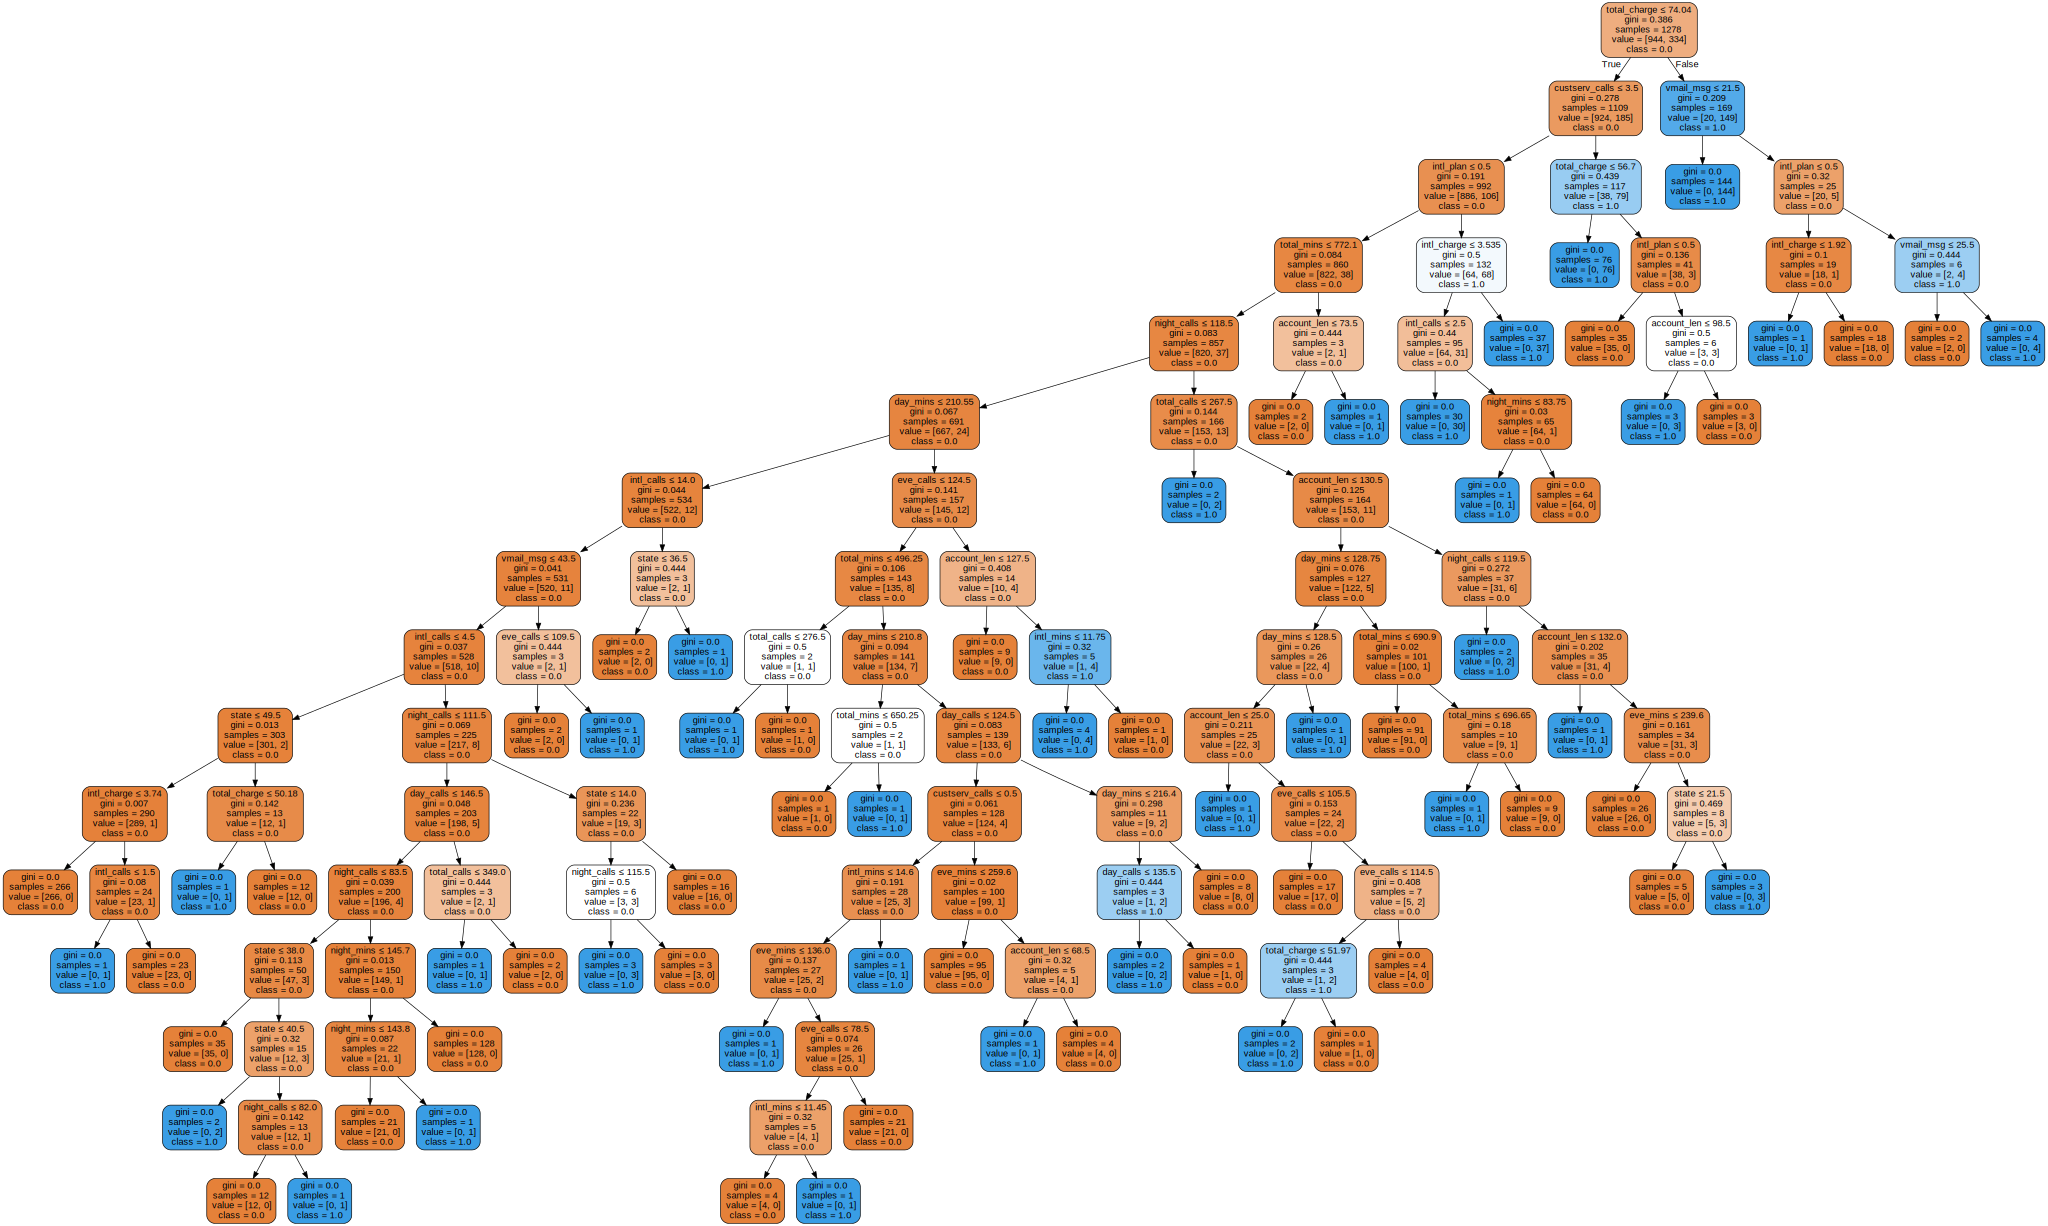

In [210]:
class_names = dtree.classes_.astype(str)
feature_names = df.columns[:19]

dot_data = tree.export_graphviz(dtree, out_file=None, 
                         feature_names=feature_names,  
                         class_names=class_names,  
                         filled=True, rounded=True,  
                         special_characters=True)  
dtree_graph = graphviz.Source(dot_data)  
dtree_graph

In [211]:
#Model Performance
#setting performance parameters
kfold = model_selection.KFold(n_splits=10, random_state=seed)

#calling the cross validation function
dtree_cv_results = model_selection.cross_val_score(dtree, X_train, Y_train, cv=kfold, scoring=scoring)

#displaying the mean and standard deviation of the prediction
msg = "%s: %f (%f)" % ('Decision Tree accuracy', dtree_cv_results.mean(), dtree_cv_results.std())
print(msg)

Decision Tree accuracy: 0.910802 (0.025801)


In [212]:
#Initialize Random Forest
rforest = RandomForestClassifier(n_estimators=100)

# Test options and evaluation metric
scoring = 'accuracy'

#Fitting the training set
rforest.fit(X_train, Y_train) 

#Predicting for the Test(Validation) Set
pred_rforest = rforest.predict(X_validation)

#Calculate accuracy in training set
msg = "%s: %f" % ('Training Model accuracy', rforest.score(X_train,Y_train,))
print(msg)

#Validation set accuracy
msg = "%s: %f" % ('Model accuracy', sklearn.metrics.accuracy_score(Y_validation,pred_rforest))
print(msg)

Training Model accuracy: 1.000000
Model accuracy: 0.955556


In [213]:
#Model Performance
#setting performance parameters
kfold = model_selection.KFold(n_splits=10, random_state=seed)

#calling the cross validation function
rforest_cv_results = model_selection.cross_val_score(rforest, X_train, Y_train, cv=kfold, scoring=scoring)

#displaying the mean and standard deviation of the prediction
msg = "%s: %f (%f)" % ('Decision Tree accuracy', rforest_cv_results.mean(), rforest_cv_results.std())
print(msg)

Decision Tree accuracy: 0.963257 (0.018143)
